In [29]:
%matplotlib inline
import pylab
import random
import numpy as np
import pandas as pd
from collections import defaultdict

In [16]:
people = pd.read_json('/Users/ajmendez/data/okcupid/random_v2.json')

In [30]:
# Simple Markov chain generator.
# Modified from:
#   http://alexeymk.com/2012/07/15/weekend-hack--a-markov-baby-name-generator.html
WORD_SEP = ' '
class MarkovName(object):
    def __init__(self, names):
        '''names is a list sampling some population'''
        self.chain = defaultdict(list)
        self.mean_length = usernames.apply(len).mean()
        
        for name in names:
            proper_name = name.lower().strip()
            for first, second in zip(proper_name, proper_name[1:]):
                self.chain[first].append(second)
            self.chain[proper_name[-1]].append(WORD_SEP)
            self.chain[WORD_SEP].append(proper_name[0])
    
    def __call__(self):
        name = []
        current = WORD_SEP  # used to mark both first and last character
        while not (current == WORD_SEP and name):
            current = random.choice(self.chain[current])
            if current == WORD_SEP:
                if 
            name.append(current)
        
        return ''.join(name).strip().capitalize()

<Container object of 10 artists>

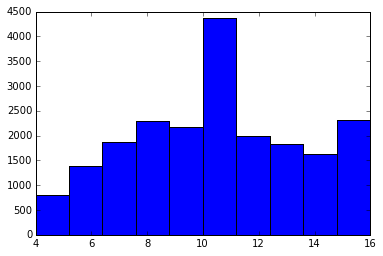

In [48]:
v,l = np.histogram(usernames.apply(len).as_matrix())
pylab.bar(left=l[:-1], width=np.diff(l),
          height=v)

In [40]:
usernames = people[people['match'] > 90]['username']

In [35]:
highmatch = MarkovName(usernames)

In [49]:
[highmatch() for i in range(20)]

[u'Anwa',
 u'W43',
 u'Heesic',
 u'Byd',
 u'Ststri',
 u'H84',
 u'Barseerl',
 u'Sens07',
 u'Mis',
 u'Thizisbr428',
 u'Kse8',
 u'Jifmckamapot_s',
 u'Ju',
 u'Antattoucykaig',
 u'Ngeetamine15',
 u'Fr7',
 u'Fux001',
 u'Lbounwes',
 u'Mntangkauviduer',
 u'Jethororleappheladabeenalyserepardoly']

In [ ]:
# get a list of words with only ASCII characters
words = [w.strip().lower() for w in open("/usr/share/dict/words").readlines()]
words = [w for w in words if all([c in ascii_lowercase for c in w])]
words = ["^" + w + "$" for w in words if w != ""]

# construct a discrete-time markov chain of n-grams
n = 5 # this is the "n" in n-grams, try adjusting this for different results
transitions = defaultdict(lambda: defaultdict(float))
for word in words:
  if len(word) >= n:
    transitions[""][word[:n]] += 1.0
  for i in range(len(word) - n):
    gram = word[i : i + n]
    next = word[i + 1 : i + n + 1]
    transitions[gram][next] += 1.0

# normalize the probabilities
for gram in transitions:
  total = sum([transitions[gram][next] for next in transitions[gram]])
  for next in transitions[gram]:
    transitions[gram][next] /= total

# sample a probability mass function (dict from elements to probabilities)
def sample(pmf):
  sample = random()
  cdf = 0.0
  for e in pmf:
    cdf += pmf[e]
    if cdf >= sample:
      return e
  return choice(pmf.keys())

# generate a word according to the markov chain
def gen_word():
  # start with a prefix
  word = sample(transitions[""])

  # wait until the markov chain adds a terminator to the word
  while word[-1] != "$":
    # append a new letter chosen according to the markov chain
    gram = word[-n:]
    if gram in transitions:
      word += sample(transitions[gram])[-1:]
    else:
      word += choice(ascii_lowercase + "$")

    # optional: allow multi-word domains
    if word[-1] == "$" and random() > 0.7 and len(word) < 8:
      word += sample(transitions[""])

  # remove the boundary markers and return the word
  return word.replace("^", "").replace("$", "")
